In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

np.random.seed(1)

get_px = lambda x: web.DataReader(x, 'google', start='2015-01-01', end='2017-01-01')['Close']

symbols = ['SPY','TLT','MSFT']
data = pd.DataFrame({sym:get_px(sym) for sym in symbols})
lrets = np.log(data/data.shift(1)).dropna()

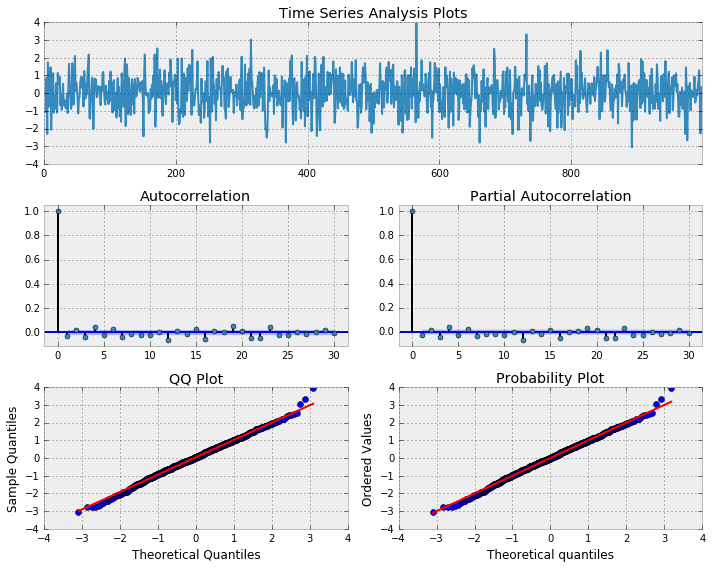

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
        
# plot of discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)

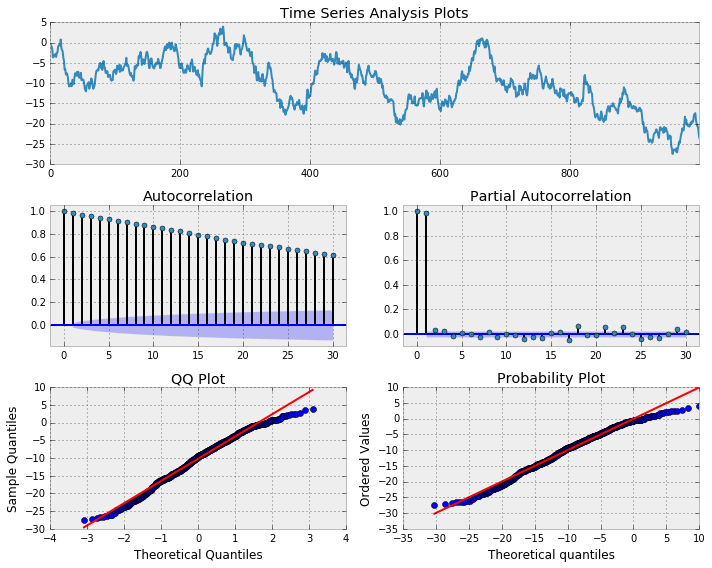

In [4]:
n_samples = 1000
x = w = np.random.normal(size=n_samples)
for t in range(n_samples):
    x[t] = x[t-1] + w[t]
tsplot(x, lags=30)

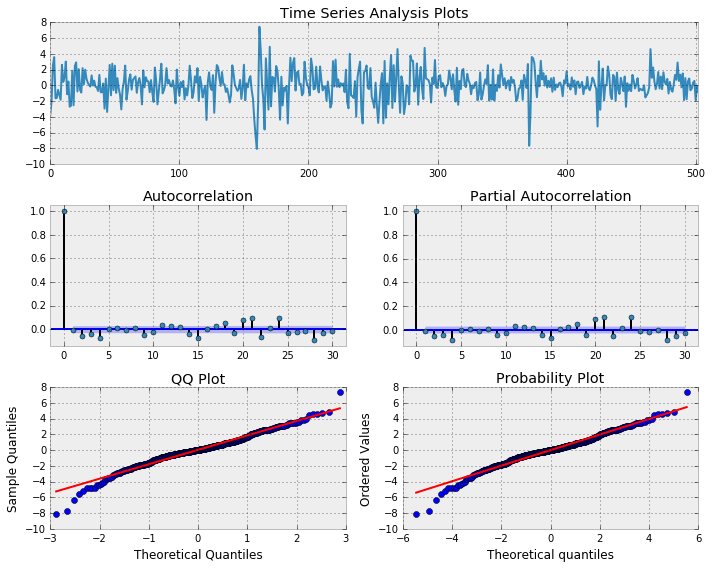

In [6]:
tsplot(np.diff(data.SPY), lags=30)

## Autoregressive Models - AR(p)

In [11]:
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)
for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
    
mdl = smt.AR(x).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(x).select_order(maxlag=30, ic='aic', trend='nc')
true_order = 1
print('alpha estimate: {:3.5f} | best lag order = {}'.format(mdl.params[0], est_order))
print('true alpha = {} | true order = {}'.format(a, true_order))

alpha estimate: 0.58703 | best lag order = 1

true alpha = 0.6 | true order = 1


coef estimate: 0.6786 -0.4013 | best lag order = 2
true coefs = [0.666, -0.333] | true order = 2


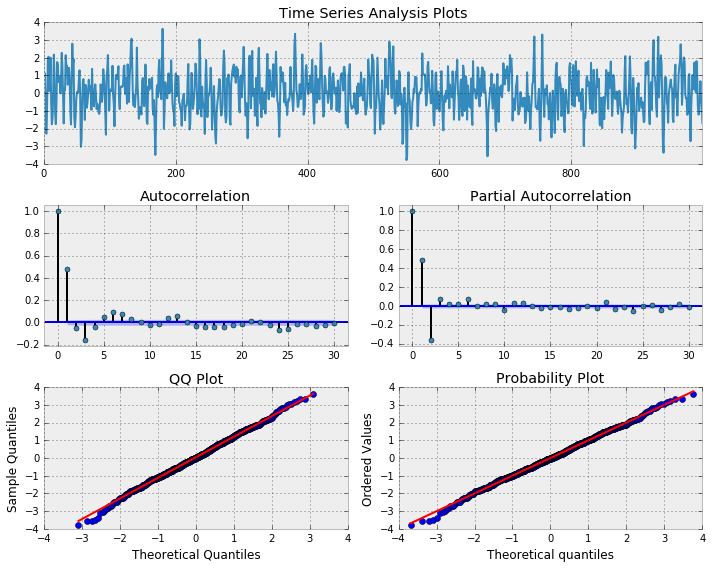

In [14]:
n = int(1000)
alphas = np.array([.666, -.333])
betas = np.array([0.])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
tsplot(ar2, lags=30)

max_lag = 10
mdl = smt.AR(ar2).fit(maxlag=max_lag, ic='aic', trend='nc')
est_order = smt.AR(ar2).select_order(
    maxlag=max_lag, ic='aic', trend='nc')

true_order = 2
print('coef estimate: {:3.4f} {:3.4f} | best lag order = {}'.format(mdl.params[0],mdl.params[1], est_order))
print('true coefs = {} | true order = {}'.format([.666,-.333], true_order))

In [15]:
max_lag = 30
mdl = smt.AR(lrets.MSFT).fit(maxlag=max_lag, ic='aic', trend='nc')
est_order = smt.AR(lrets.MSFT).select_order(maxlag=max_lag, ic='aic', trend='nc')
print('best estimated lag order = {}'.format(est_order))

best estimated lag order = 1
